# Dog and Cat image classification using CNN


<img src="https://cdn.pixabay.com/photo/2015/05/20/10/03/cat-and-dog-775116_960_720.jpg" alt="Image of cats and dogs" style="width: 500px;"/>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms as tfs
from torch.utils.data import DataLoader, TensorDataset, random_split
from pathlib import Path
import shutil
import re
from tqdm.notebook import tqdm
from torch import optim
from torch import nn
import torch.nn.functional as F

---
## 1. Loading the data and preprocessing

In [ ]:
# TODO: Change the directories accordingly
train_path = r"\deep-machine-learning\home-assignments\HA1\train"
val_path = r"\deep-machine-learning\home-assignments\HA1\val"
small_train_path = r"\deep-machine-learning\home-assignments\HA1\small_train"
small_val_path = r"\deep-machine-learning\home-assignments\HA1\small_val"

---
## 2. Training


In [ ]:
from torch import nn
import torch.nn.functional as F

class DigitClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=3, stride = 1, padding = ((1,1)))
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,kernel_size=3, stride = 1, padding = ((1,1)))
        self.conv3 = nn.Conv2d(in_channels=50,out_channels= 60,kernel_size=3, stride = 1, padding = ((1,1)))

        
        self.fc1 = nn.Linear(60*15*15, 100)
        self.fc2 = nn.Linear(100,2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2,stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2,stride=2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, kernel_size=2,stride=1)
        x = x.view(-1, 60*15*15)
        x = F.relu(self.fc1(x))
        x= self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
# The following line automatically figures out what device (cpu or gpu)
# Later we can use the `.to(device)` method to move our data or model to the correct device.
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = DigitClassifierNetwork()
model.to(device);
loss_fn = nn.CrossEntropyLoss()
# We provide the `Adam` optimizer with the model parameters,
# effectively telling it which parameters we consider trainable.
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(small_val_data)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

In [ ]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(10):
    losses = []
    n_correct = 0
    for b_x, b_y in tqdm(small_train_dataloader):
        b_x = b_x.cuda()
        b_y = b_y.cuda()
        
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(small_train_data)
    train_avg_loss = sum(losses)/len(losses)    
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_avg_loss = evaluate_model(small_val_dataloader, model, loss_fn)
    
    train_losses.append(train_avg_loss)
    val_losses.append(val_avg_loss)
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


Epoch 0 	Loss: 1.526 	Loss (val): 0.695	Accuracy: 0.50 	Accuracy (val): 0.50



Epoch 1 	Loss: 0.693 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50



Epoch 2 	Loss: 0.692 	Loss (val): 0.692	Accuracy: 0.51 	Accuracy (val): 0.51



Epoch 3 	Loss: 0.687 	Loss (val): 0.687	Accuracy: 0.53 	Accuracy (val): 0.56



Epoch 4 	Loss: 0.680 	Loss (val): 0.681	Accuracy: 0.56 	Accuracy (val): 0.55



Epoch 5 	Loss: 0.677 	Loss (val): 0.678	Accuracy: 0.55 	Accuracy (val): 0.57



Epoch 6 	Loss: 0.667 	Loss (val): 0.681	Accuracy: 0.57 	Accuracy (val): 0.57



Epoch 7 	Loss: 0.662 	Loss (val): 0.676	Accuracy: 0.59 	Accuracy (val): 0.57



Epoch 8 	Loss: 0.650 	Loss (val): 0.676	Accuracy: 0.59 	Accuracy (val): 0.57



Epoch 9 	Loss: 0.647 	Loss (val): 0.698	Accuracy: 0.59 	Accuracy (val): 0.55


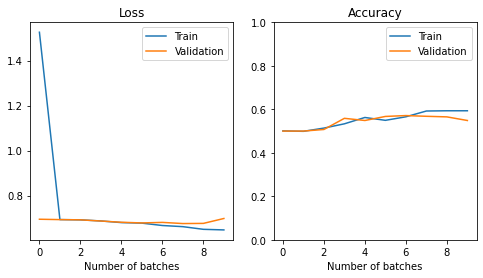

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1

# Update plots
ax[0].clear()
ax[0].plot(train_losses)
ax[0].plot(val_losses)

ax[1].clear()
ax[1].plot(train_accs)
ax[1].plot(val_accs)

# Add legends and labels
ax[0].set_title('Loss')
ax[0].set_xlabel('Number of batches')
ax[0].legend(['Train', 'Validation'])

ax[1].set_title('Accuracy')
ax[1].set_xlabel('Number of batches')
ax[1].legend(['Train', 'Validation'])
ax[1].set_ylim([0,1])

# Draw the figure on the screen
fig.canvas.draw()

---
## 3. Improving the model

In [ ]:
class DigitClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=3, stride = 1, padding = ((1,1)))
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,kernel_size=3, stride = 1, padding = ((1,1)))
        self.conv3 = nn.Conv2d(in_channels=50,out_channels= 60,kernel_size=3, stride = 1, padding = ((1,1)))     
        self.bn1 = nn.BatchNorm2d(num_features=20)
        self.bn2 = nn.BatchNorm2d(num_features=50)
        self.bn3 = nn.BatchNorm2d(num_features=60)
        self.fc1 = nn.Linear(60*15*15,200)
        self.fc2 = nn.Linear(200,2)
        self.m = nn.Dropout(p=0.25)

        self.dense_bn1 = nn.BatchNorm1d(num_features=200)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(self.bn1(x), kernel_size=2,stride=2)
        x = F.relu(self.m(self.conv2(x)))
        x = F.max_pool2d(self.bn2(x), kernel_size=2,stride=2)
        x = F.relu(self.m(self.conv3(x)))
        x = F.max_pool2d(self.bn3(x), kernel_size=2,stride=1)
        x = x.view(-1, 60*15*15)
        x = F.relu(self.m(self.dense_bn1(self.fc1(x))))
        x= self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

model = DigitClassifierNetwork()
model.to(device);
loss_fn = nn.CrossEntropyLoss()
# effectively telling it which parameters we consider trainable.
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-2)

In [ ]:
def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(small_val_data)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

In [ ]:
train3_losses = []
val3_losses = []
train3_accs = []
val3_accs = []

for epoch in range(10):
    losses = []
    n_correct = 0
    for b_x, b_y in tqdm(small_train_dataloader):
        b_x = b_x.cuda()
        b_y = b_y.cuda()
        
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(small_train_data)
    train_avg_loss = sum(losses)/len(losses)    
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_avg_loss = evaluate_model(small_val_dataloader, model, loss_fn)
    
    train3_losses.append(train_avg_loss)
    val3_losses.append(val_avg_loss)
    train3_accs.append(train_accuracy)
    val3_accs.append(val_accuracy)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


Epoch 0 	Loss: 0.661 	Loss (val): 0.570	Accuracy: 0.66 	Accuracy (val): 0.71



Epoch 1 	Loss: 0.515 	Loss (val): 0.531	Accuracy: 0.74 	Accuracy (val): 0.74



Epoch 2 	Loss: 0.464 	Loss (val): 0.540	Accuracy: 0.77 	Accuracy (val): 0.74



Epoch 3 	Loss: 0.415 	Loss (val): 0.540	Accuracy: 0.81 	Accuracy (val): 0.74



Epoch 4 	Loss: 0.362 	Loss (val): 0.511	Accuracy: 0.83 	Accuracy (val): 0.76



Epoch 5 	Loss: 0.311 	Loss (val): 0.529	Accuracy: 0.88 	Accuracy (val): 0.75



Epoch 6 	Loss: 0.272 	Loss (val): 0.552	Accuracy: 0.89 	Accuracy (val): 0.76



Epoch 7 	Loss: 0.238 	Loss (val): 0.532	Accuracy: 0.91 	Accuracy (val): 0.77



Epoch 8 	Loss: 0.227 	Loss (val): 0.552	Accuracy: 0.91 	Accuracy (val): 0.77



Epoch 9 	Loss: 0.217 	Loss (val): 0.551	Accuracy: 0.92 	Accuracy (val): 0.77


Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

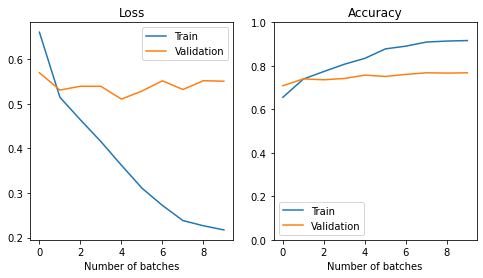

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1


# Update plots
ax[0].clear()
ax[0].plot(train3_losses)
ax[0].plot(val3_losses)

ax[1].clear()
ax[1].plot(train3_accs)
ax[1].plot(val3_accs)

# Add legends and labels
ax[0].set_title('Loss')
ax[0].set_xlabel('Number of batches')
ax[0].legend(['Train', 'Validation'])

ax[1].set_title('Accuracy')
ax[1].set_xlabel('Number of batches')
ax[1].legend(['Train', 'Validation'])
ax[1].set_ylim([0,1])

# Draw the figure on the screen
fig.canvas.draw()

In [ ]:
# Saving the model
torch.save(model.state_dict(), "my_model")

---
## 4. Transfer Learning

In [ ]:
import torchvision.models as models
vgg = models.vgg16(pretrained= True)

In [ ]:
print(vgg.classifier)
num_features = vgg.classifier[3].in_features
for i in range(5):
    features = list(vgg.classifier.children())[:-4]
features.extend([nn.Linear(num_features, 2)])

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [ ]:
vgg.classifier = nn.Sequential(*features)
print(vgg.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=2, bias=True)
)


### 4.1 Using VGG features

In [ ]:
# Freeze bottom
for parameter in vgg.features.parameters():
    parameter.require_grad = False

In [ ]:
small_train_data=datasets.ImageFolder(Path.cwd() / "small_train",tfs.Compose([tfs.Resize((224,224)),tfs.ToTensor(),tfs.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]))
small_val_data=datasets.ImageFolder(Path.cwd() / "small_val", tfs.Compose([tfs.Resize((224,224)),tfs.ToTensor(),tfs.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]))

small_train_dataloader=torch.utils.data.DataLoader(small_train_data, batch_size=64, shuffle=True, num_workers=5)
small_val_dataloader=torch.utils.data.DataLoader(small_val_data, batch_size=64, shuffle=True, num_workers=5)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
# YOUR CODE HERE
model = vgg
# We moved the dataset to `device`, then we must move model as well.
# Don't worry, if you forget it pytorch will throw an error and your code will not run before you fix it.
model.to(device);
loss_fn = nn.CrossEntropyLoss()
# We provide the `Adam` optimizer with the model parameters,
# effectively telling it which parameters we consider trainable.
optimizer = optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-2)

In [ ]:
def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(small_val_data)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

In [ ]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(5):
    losses = []
    n_correct = 0
    for b_x, b_y in tqdm(small_train_dataloader):
        
        b_x = b_x.cuda()
        b_y = b_y.cuda()
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(small_train_data)
    train_avg_loss = sum(losses)/len(losses)    
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_avg_loss = evaluate_model(small_val_dataloader, model, loss_fn)
    
    train_losses.append(train_avg_loss)
    val_losses.append(val_avg_loss)
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


Epoch 0 	Loss: 0.100 	Loss (val): 0.045	Accuracy: 0.96 	Accuracy (val): 0.99



Epoch 1 	Loss: 0.022 	Loss (val): 0.033	Accuracy: 0.99 	Accuracy (val): 0.99



Epoch 2 	Loss: 0.033 	Loss (val): 0.060	Accuracy: 0.99 	Accuracy (val): 0.97



Epoch 3 	Loss: 0.039 	Loss (val): 0.113	Accuracy: 0.99 	Accuracy (val): 0.96



Epoch 4 	Loss: 0.015 	Loss (val): 0.057	Accuracy: 0.99 	Accuracy (val): 0.98


Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

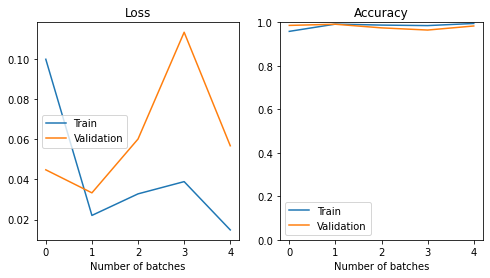

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1


# Update plots
ax[0].clear()
ax[0].plot(train_losses)
ax[0].plot(val_losses)

ax[1].clear()
ax[1].plot(train_accs)
ax[1].plot(val_accs)

# Add legends and labels
ax[0].set_title('Loss')
ax[0].set_xlabel('Number of batches')
ax[0].legend(['Train', 'Validation'])

ax[1].set_title('Accuracy')
ax[1].set_xlabel('Number of batches')
ax[1].legend(['Train', 'Validation'])
ax[1].set_ylim([0,1])

# Draw the figure on the screen
fig.canvas.draw()

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

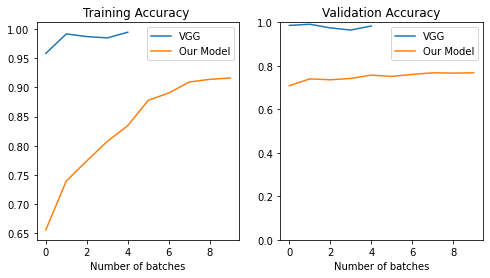

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1

# Update plots
ax[0].clear()
ax[0].plot(train_accs)
ax[0].plot(train3_accs)

ax[1].clear()
ax[1].plot(val_accs)
ax[1].plot(val3_accs)

# Add legends and labels
ax[0].set_title('Training Accuracy ')
ax[0].set_xlabel('Number of batches')
ax[0].legend(['VGG', 'Our Model'])

ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Number of batches')
ax[1].legend(['VGG', 'Our Model'])
ax[1].set_ylim([0,1])

# Draw the figure on the screen
fig.canvas.draw()



Save the model to a file.

In [ ]:
torch.save(vgg.state_dict(), "trans_learning_top_only")

### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers by resetting the `requires_grad` attribute to `True`.

In [ ]:
# UnFreeze bottom
for parameter in vgg.features.parameters():
    parameter.require_grad = True

In [ ]:
small_train_data=datasets.ImageFolder(Path.cwd() / "small_train",tfs.Compose([tfs.Resize((224,224)),tfs.ToTensor(),tfs.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]))
small_val_data=datasets.ImageFolder(Path.cwd() / "small_val", tfs.Compose([tfs.Resize((224,224)),tfs.ToTensor(),tfs.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]))

small_train_dataloader=torch.utils.data.DataLoader(small_train_data, batch_size=64, shuffle=True, num_workers=5)
small_val_dataloader=torch.utils.data.DataLoader(small_val_data, batch_size=64, shuffle=True, num_workers=5)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = vgg
model.to(device);
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-2)

In [ ]:
def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(small_val_data)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

In [ ]:
train_fine_losses = []
val_fine_losses = []
train_fine_accs = []
val_fine_accs = []

for epoch in range(5):
    losses = []
    n_correct = 0
    for b_x, b_y in tqdm(small_train_dataloader):
        
        b_x = b_x.cuda()
        b_y = b_y.cuda()
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(small_train_data)
    train_avg_loss = sum(losses)/len(losses)    
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_avg_loss = evaluate_model(small_val_dataloader, model, loss_fn)
    
    train_fine_losses.append(train_avg_loss)
    val_fine_losses.append(val_avg_loss)
    train_fine_accs.append(train_accuracy)
    val_fine_accs.append(val_accuracy)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


Epoch 0 	Loss: 0.052 	Loss (val): 0.083	Accuracy: 0.98 	Accuracy (val): 0.98



Epoch 1 	Loss: 0.023 	Loss (val): 0.106	Accuracy: 0.99 	Accuracy (val): 0.98



Epoch 2 	Loss: 0.032 	Loss (val): 0.077	Accuracy: 0.99 	Accuracy (val): 0.97



Epoch 3 	Loss: 0.037 	Loss (val): 0.266	Accuracy: 0.99 	Accuracy (val): 0.92



Epoch 4 	Loss: 0.069 	Loss (val): 0.120	Accuracy: 0.98 	Accuracy (val): 0.97


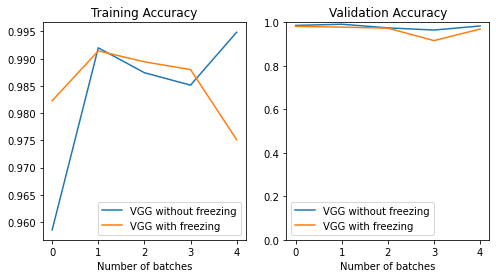

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1

# Update plots
ax[0].clear()
ax[0].plot(train_accs)
ax[0].plot(train_fine_accs)

ax[1].clear()
ax[1].plot(val_accs)
ax[1].plot(val_fine_accs)

# Add legends and labels
ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Number of batches')
ax[0].legend(['VGG without freezing', 'VGG with freezing'])

ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Number of batches')
ax[1].legend(['VGG without freezing', 'VGG with freezing'])
ax[1].set_ylim([0,1])

# Draw the figure on the screen
fig.canvas.draw()



Save the model to file.

In [ ]:
torch.save(vgg.state_dict(), "trans_learning_full")

## 5. Final training

In [ ]:
large_train_data=datasets.ImageFolder(Path.cwd() / "train", tfs.Compose([tfs.Resize((224,224)),tfs.ToTensor(),tfs.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]))
large_val_data=datasets.ImageFolder(Path.cwd() / "val", tfs.Compose([tfs.Resize((224,224)),tfs.ToTensor(),tfs.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]))

large_train_dataloader= torch.utils.data.DataLoader(large_train_data, batch_size=64, shuffle=True, num_workers=0)
large_val_dataloader= torch.utils.data.DataLoader(large_val_data, batch_size=16, shuffle=True, num_workers=0)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model.to(device);
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-2)

In [ ]:
def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(large_val_data)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

In [ ]:
train_full_losses = []
val_full_losses = []
train_full_accs = []
val_full_accs = []

for epoch in range(5):
    losses = []
    n_correct = 0
    for b_x, b_y in tqdm(large_train_dataloader):
        
        b_x = b_x.cuda()
        b_y = b_y.cuda()

        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(large_train_data)
    train_avg_loss = sum(losses)/len(losses)    
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_avg_loss = evaluate_model(large_val_dataloader, model, loss_fn)
    
    train_full_losses.append(train_avg_loss)
    val_full_losses.append(val_avg_loss)
    train_full_accs.append(train_accuracy)
    val_full_accs.append(val_accuracy)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))


Epoch 0 	Loss: 0.084 	Loss (val): 0.057	Accuracy: 0.97 	Accuracy (val): 0.98



Epoch 1 	Loss: 0.086 	Loss (val): 0.063	Accuracy: 0.97 	Accuracy (val): 0.98



Epoch 2 	Loss: 0.079 	Loss (val): 0.074	Accuracy: 0.97 	Accuracy (val): 0.97



Epoch 3 	Loss: 0.084 	Loss (val): 0.093	Accuracy: 0.97 	Accuracy (val): 0.96



Epoch 4 	Loss: 0.092 	Loss (val): 0.081	Accuracy: 0.96 	Accuracy (val): 0.97


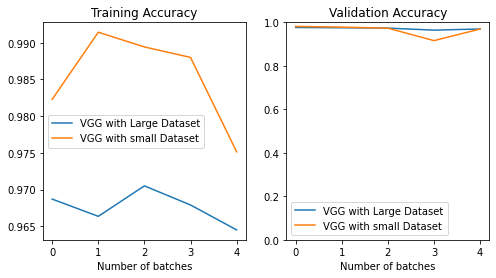

In [ ]:
# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1

# Update plots
ax[0].clear()
ax[0].plot(train_full_accs)
ax[0].plot(train_fine_accs)

ax[1].clear()
ax[1].plot(val_full_accs)
ax[1].plot(val_fine_accs)

# Add legends and labels
ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Number of batches')
ax[0].legend(['VGG with Large Dataset', 'VGG with small Dataset'])

ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Number of batches')
ax[1].legend(['VGG with Large Dataset', 'VGG with small Dataset'])
ax[1].set_ylim([0,1])

# Draw the figure on the screen
fig.canvas.draw()
